<a href="https://colab.research.google.com/github/magdapoppins/RNN-workshop/blob/main/text_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Networks
## Text generation

Dataset: https://www.gutenberg.org/ebooks/search/?query=jane+austin&submit_search=Go%21

### Differences in neural network architecture
- Neural networks can be tailored to fit the specific task we try to achieve better and to reduce training time
- Tailoring can be done for example: 
  - Force neurons to share weights
  - Constrain the set of fuctions it can learn
- For example, text data has a very regular structure which is why we have specific architectures for neural networks that have proven successful with text

### What is sequential data
"Where is the ball going to be in 1 second?"
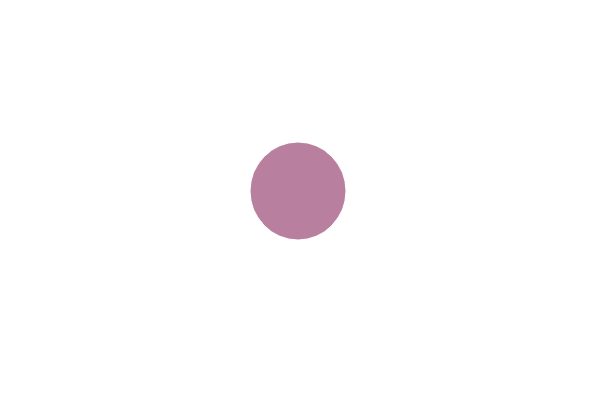

What about now?
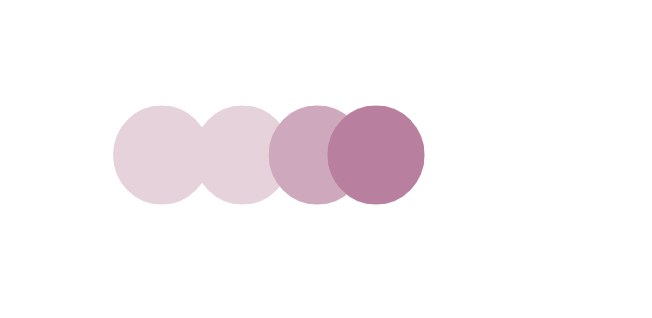





### Enter RNN
- Recurrent neural networks are best suited for making predictions from sequential (order matters) data, such as sequential images (movement) or text
- 1 hidden layer 
- a sequential memory storing the output of that hidden layer and feeding it back into the hidden layer with the next input
- the depth of an RNN comes from the sequential memory (the network is as deep as the sequence is long)
- You can choose to feed in the input either word by word, or character by character
- Notice that the weights are the same for each "layer" or iteration in a RNN, whereas they differ in other neural networks
- Another speciality about RNNs compared to other neural networks is that the input and output formats are more flexible - you can for example take multiple inputs (a whole chunk of text) and produce one output (this is done in sentiment analysis, where you get a score for a chunk of text) or you can have a chunk of text (i.e. multiple inputs) and produce multiple outputs, like when you translate sentences!

**The illustrations below shows a folded and unfolded RNN, where at each point in time (t)**
- x is the input
- o is the output
- h is the RNN node containing the weights and activation functions
- v represents the sequential memory

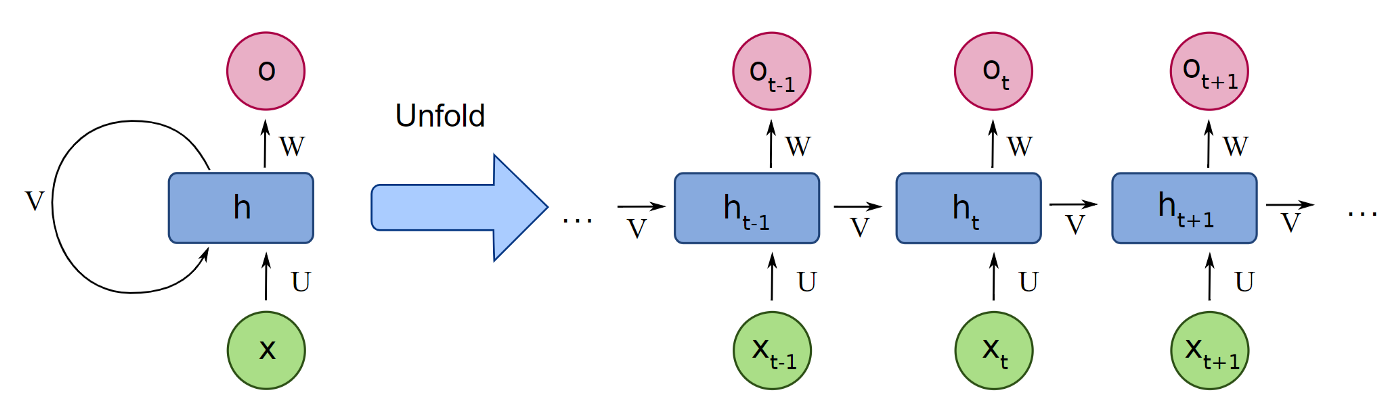

### Sequential memory
- "Traditional" neural networks are feed-forward, meaning that the input flows from the input layer, through the hidden layers and to the output layer
- The single hidden layer in an RNN has a sequential memory, or a kind of loop, that feeds back in the previous items of the input together with the next input


### Backpropagation through time (BPTT)
- Backpropagation in training a neural network refers to updating its weights in order to minimize its error
- The backpropagation method for RNNs is BPTT
- To recap: a RNN "sees" an input and at each step of time, it produces an output
- BPTT "unrolls" the time steps so that each step has one input timestep, a copy of the network and one output
- Then we calculate the errors and accumulate them for each timestep
- Then we "roll" the time steps again and update the weights
- Since the count of the input sequence length determines the "layers" in the RNN, the length will be the count of how many times the errors need to be calculated - this may lead to the issue with weights "vanishing" or "expoding" (this is also known as the vanishing gradient problem)

### Truncated backpropagation through time (TBTT)
- TBPTT is a modification of BPTT
- The difference is that in TBPTT the number of steps that the backpropagation is done for is truncated, or cut off at a specified limit
- This resolves the main problem with BPTT - the high cost of updating weights in long sequences


### From vanilla RNN to GRU and LSTM

Let's look at a the RNN node as seen in the folded-unfolded illustration above. 
- We have an input x and the sequential memory h
- We use tanh as our activation function (most RNNs use sigmoid, tanh or RELU as their activation function - remember how those looked?)
- The activation function produces an output which is passed both out to the output layer and forward to the next "layer"


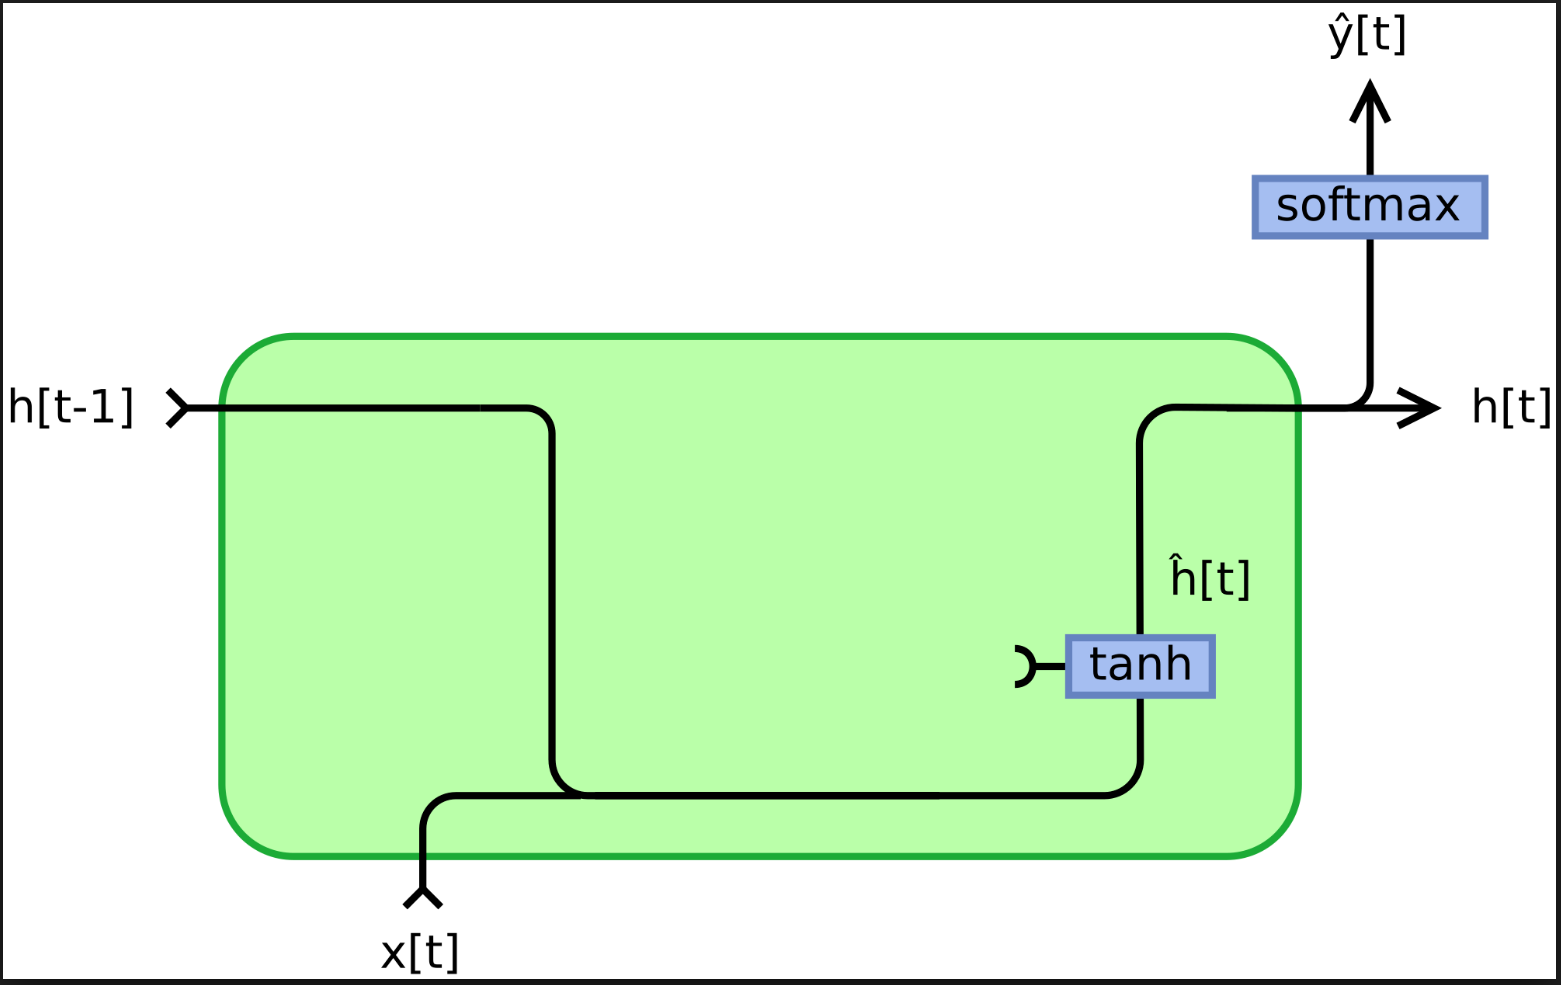

To improve the results of the "vanilla" RNN by responding to the issue of vanishing gradients, two other node architectures have been created. They are LSTM (long short-term memory) and GRU (gated recurrent unit). These variants are based on containing "gates", which form a kind of mini-network in themselves.

Let's first look at a LSTM node:
- We get the input x and sequential memory h
- The node has "gates" - a reset gate, an update gate, a forget gate and an output gate
- The forget gate determines how much information should be kept from the previous states 
- The reset gate determines if the previous input was relevant or not
- The update gate determines if the cell state should be updated with the candidate state
- The final state cell may or may not be updated with the current state depending on the update function
- The output gate defines what the next output to the hidden state will be

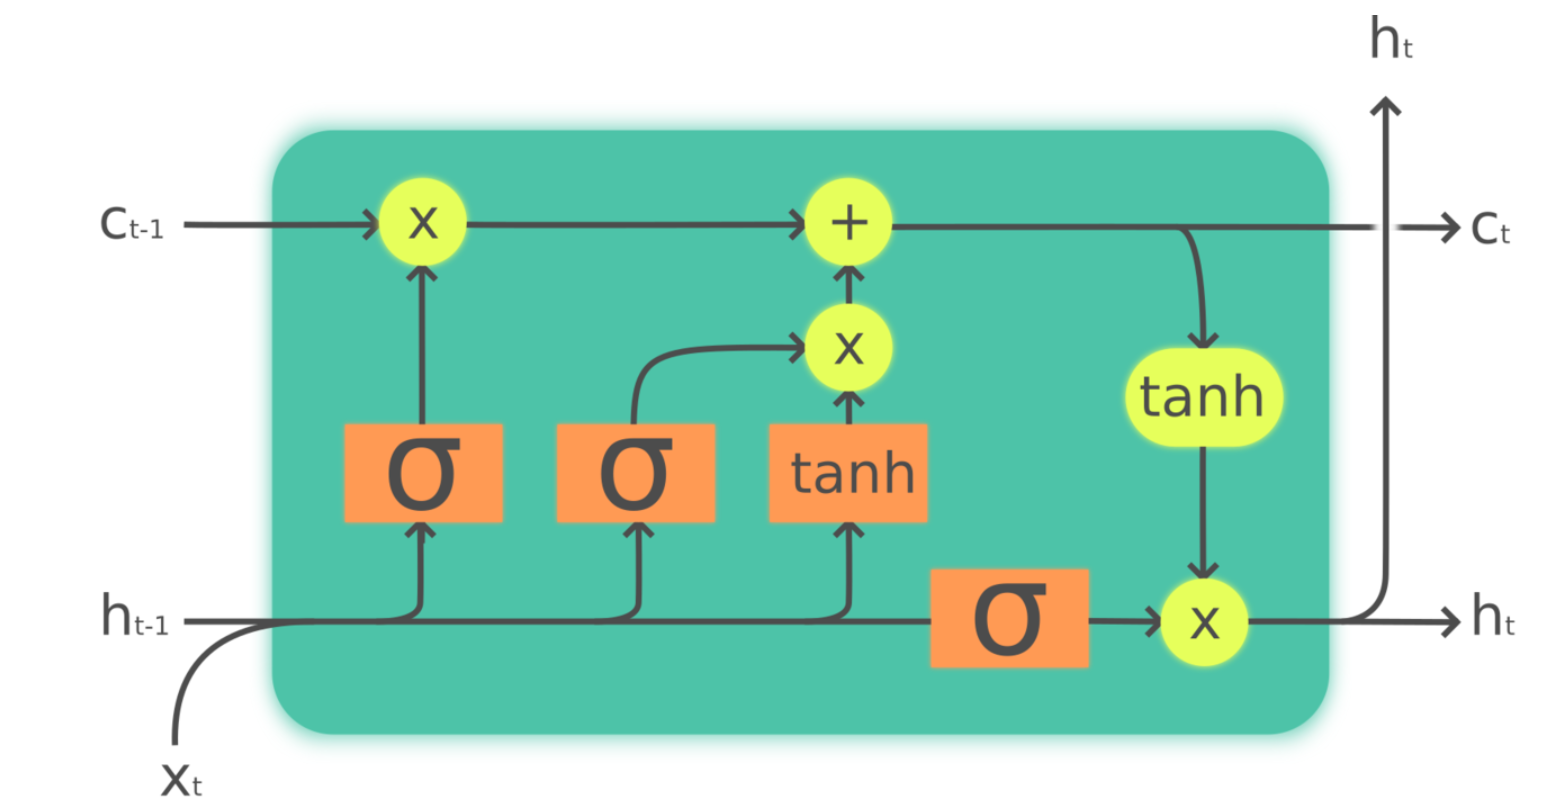

And finally, let's take a glance at a GRU node:
- GRU is very similar to LSTM, except for that it doesn't have the forget and output gates


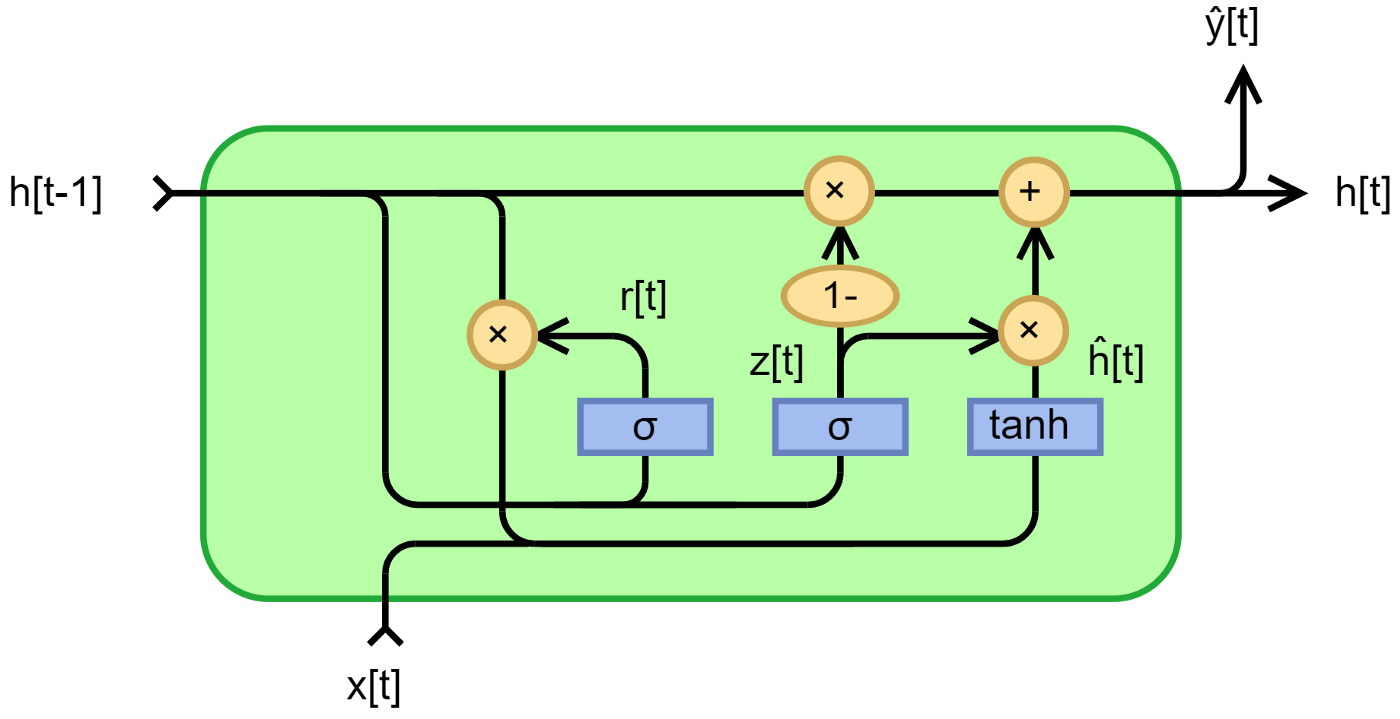

### Text generation
You have probably already used some kind of text generation in your everyday life! Some examples are
1. Freeform text generation such as the suggestions you get when writing an email
2. Chatbots that are answering questions
3. Summarization using ML

# Study Project - Jane Austen

### Our project plan
0. Import the required libraries
1. Fetch the text data
2. Create a mapping from unique characters to integers
3. Transform the dataset into patterns of a specified length with a label-value mapping 
4. Reshape the inputs to contain the samples, the time step count and features
5. Normalize the inputs
6. One hot encode the output variables
7. Define the LSTM model 
4. Define our checkpoints
5. Fit the model (go get a coffee)

## Jane Austen,  1775-1817
- Novelist who critiqued and commented on the lives of the gentry (landowners) in Great Britain in the 18th century
- Known for her humor and irony and views on matters like womend dependence on marriage

Feel free to take a look at a trailer of a film based on her novel, [Emma](https://www.youtube.com/watch?v=JniWHloJAvY). 

## Install the required libraries
- numpy
- keras Sequential model
- Dense, Dropout and LSTM from keras.layers
- keras ModelCheckpoint
- keras np_utils


In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

## Fetching and checking the data
- For this purpose we will download Jane Austens book Emma from gutenberg.org, cut out the guteberg preamble and upload it to the colab folder 
- A suitable minimal character count for training a model like this would be around 100 000 characters - otherwise, the model might not properly learn to speak English (remember, it is character-based!)

In [ ]:
filename = "emma.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
print(f'Length of text: {len(raw_text)} characters')

Length of text: 897986 characters


For the purpose of this example, we will only do a training on a small slice of data (since we don't have all day). Let's only use the first 200 000 characters of Emma.

In [ ]:
# Shorten the text
raw_text = raw_text[:100000]

# Transform the text into lowercase and drop trailing and leading whitespaces
raw_text = raw_text.lower()

# TODO replace rare characters eg é with e
print(f'Length of text: {len(raw_text)} characters')

Length of text: 100000 characters


In [ ]:
# What does a piece of the dataset look like?
print(raw_text[:1000])

chapter i


emma woodhouse, handsome, clever, and rich, with a comfortable home and
happy disposition, seemed to unite some of the best blessings of
existence; and had lived nearly twenty-one years in the world with very
little to distress or vex her.

she was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister’s marriage,
been mistress of his house from a very early period. her mother had
died too long ago for her to have more than an indistinct remembrance
of her caresses; and her place had been supplied by an excellent woman
as governess, who had fallen little short of a mother in affection.

sixteen years had miss taylor been in mr. woodhouse’s family, less as a
governess than a friend, very fond of both daughters, but particularly
of emma. between _them_ it was more the intimacy of sisters. even
before miss taylor had ceased to hold the nominal office of governess,
the mildness of her temper had hardly allowed her to im

In [ ]:
# How many unique characters does it encompass?
vocab = sorted(set(raw_text))

## Create a mapping from the unique characters to integers

In [ ]:
from pprint import pprint
char_to_int = dict((c, i) for i, c in enumerate(vocab))
pprint(char_to_int)

{'\n': 0,
 ' ': 1,
 '!': 2,
 '(': 3,
 ')': 4,
 ',': 5,
 '-': 6,
 '.': 7,
 '2': 8,
 '3': 9,
 '8': 10,
 ':': 11,
 ';': 12,
 '?': 13,
 '_': 14,
 'a': 15,
 'b': 16,
 'c': 17,
 'd': 18,
 'e': 19,
 'f': 20,
 'g': 21,
 'h': 22,
 'i': 23,
 'j': 24,
 'k': 25,
 'l': 26,
 'm': 27,
 'n': 28,
 'o': 29,
 'p': 30,
 'q': 31,
 'r': 32,
 's': 33,
 't': 34,
 'u': 35,
 'v': 36,
 'w': 37,
 'x': 38,
 'y': 39,
 'z': 40,
 'é': 41,
 'ï': 42,
 '—': 43,
 '‘': 44,
 '’': 45,
 '“': 46,
 '”': 47}


## Transforming the data into inputs and outputs
Let's summarize our data by answering
- how many characters is our text in total?
- how many unique characters are there?

In [ ]:
# Let's first summarize our 
n_chars = len(raw_text)
n_vocab = len(vocab)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  100000
Total Vocab:  48


Remember how we talked about the issue with very long input sequences and RNN:s? If we were to treat this whole text as a single input, the depth of the network would become around two and a half million! That would not be good. Instead, we split the text into shorter sequences for training purposes. We use a sequence length of 100 characters.

We need to get an input of 99 characters and an output of one character, the following one. 

If our sequence length would be 5 and our sequence would be "hello", this would mean we split the text into an input "hell" and an output "o". The input is appended to dataX and the output to dataY at the same index.

In [ ]:
seq_length = 100
dataX = []
dataY = []
for i in range(n_chars - seq_length):
	seq_in = raw_text[i:i + seq_length] # The letters between i and i + 99
	seq_out = raw_text[i + seq_length] # The letter at i + 100
	dataX.append([char_to_int[char] for char in seq_in]) # Append a list of characters transformed to numbers to our input (dataX) 
	dataY.append(char_to_int[seq_out]) # Append the following character transformed to an integer to the outputs (dataY)
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  99900


## Reshape our inputs 


In [ ]:
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))

## Normalize the inputs

In [ ]:
X = X / float(n_vocab)

## One hot encode the outputs
Instead of having a single value, e.g. 30, as the output, we want to have a matrix that has a value with 1 at the correct character (e.g. 30) and zeroes at the rest of the slots. 



In [ ]:
y = np_utils.to_categorical(dataY)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Designing the model
A more naive approach could be to create a model with only one LSTM layer. However, because the model we are creating is character-based, a model with only one LSTM layer might not yet be able to learn to speak english. So let's have an extra LSTM layer just in case.

```
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
```
=> 
```
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
```



In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 48)                12336     
Total params: 276,528
Trainable params: 276,528
Non-trainable params: 0
_________________________________________________________________


## Define checkpoints

In [ ]:
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

## Training our model

In [ ]:
model.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)

Epoch 1/20
781/781 [==============================] - 548s 630ms/step - loss: 3.0831

Epoch 00001: loss improved from inf to 3.03747, saving model to weights-improvement-01-3.0375.hdf5
Epoch 2/20
781/781 [==============================] - 489s 626ms/step - loss: 2.9334

Epoch 00002: loss improved from 3.03747 to 2.91062, saving model to weights-improvement-02-2.9106.hdf5
Epoch 3/20
781/781 [==============================] - 491s 628ms/step - loss: 2.8458

Epoch 00003: loss improved from 2.91062 to 2.83132, saving model to weights-improvement-03-2.8313.hdf5
Epoch 4/20
781/781 [==============================] - 491s 629ms/step - loss: 2.7905

Epoch 00004: loss improved from 2.83132 to 2.78909, saving model to weights-improvement-04-2.7891.hdf5
Epoch 5/20
781/781 [==============================] - 494s 633ms/step - loss: 2.7545

Epoch 00005: loss improved from 2.78909 to 2.75007, saving model to weights-improvement-05-2.7501.hdf5
Epoch 6/20
781/781 [==============================] - 488s 

## Using the model

### Load the model with optimal weights
We can create a model from ready weights - in this case, we are creating a new model, but we don't need to train it. You can find the weights stored as hdf5 files in the colab folder structure.


In [ ]:
filename = "weights-improvement-20-2.1678.hdf5" # Insert the lowest loss filename here
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

### Create a reverse mapping from ints to chars
To transform the characters to integers, we created a dictionary where each character had a corresponing integer using a dict comprehension and pythons enumerate(). Let's use the same approach to create a reverse mapping!

In [ ]:
int_to_char = dict((i, c) for i, c in enumerate(vocab))

### Generate some text
In order to make use of our model, we will
1. pick a random seed sequence from our input data
2. loop for as long as you want your result to be and print the result to stdout
  - Make a prediction of the following character
  - Add that character to the seed pattern

In [ ]:
import sys

In [ ]:
# pick a random seed
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
print("------")
# generate characters
for i in range(600):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
  # Choose the most probable result
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	#seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]

Seed:
" ” said harriet, looking down.

“ought to refuse him! my dear harriet, what do you mean? are you in a "
------
nu thing mo here a dentee aro the ware of the cane to toens aeyert then  and ho has been the cane of her oinee  and an anpieiien of the cane tf the hart of the sar and toented to her  whe had aoen an toeet to heve her fend air toong ho her being anm ohe toong  and ho has been the cane of the sored  and an anpieiien of the cane tf the hart of the came to the hare  fn whu heve aeen an anciie to the hoeer toint of her oonee to her  whe had aoen aerue aor hore  and whs had been the finer the had soin to heve her an anuienien of her oanter, and she cad noen io hore and toente th cae  aede the cane 

### Conclusions of our model
- Some words come together, some don't
- Ways to improve
  - Larger dataset
  - Two LSTM layers instead of one

## Credits
- example tutorial based on https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

## Further readings
- https://calvinfeng.gitbook.io/machine-learning-notebook/supervised-learning/recurrent-neural-network/recurrent_neural_networks
